In [2]:
import sys
sys.path.append('./models/')
from Arima import ARIMA_Model, VAR_m
from SIRD  import *
from exponential_regression import ExponentialRegression, MultiDimensionalExponentialRegression
from moving_average import MovingAverage, MovingAverageMulti
from Truth import Truth
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from evaluate_model import evaluate_model, evaluate_model_multi
import json

df = pd.read_csv('deaths_and_infections.csv')

# remove a columns from a df: 
df.drop(columns=['Unnamed: 0'], inplace=True)
new_deaths=np.array(df['new_deaths'])
n_infected=np.array(df['n_infected'])
death_cumul=np.array([sum(new_deaths[:i]) for i in range(len(new_deaths))])
dates_of_pandemic=np.arange(len(new_deaths))

In [3]:
# importing mobility from the csv file
df_mobility=pd.read_csv('mobility.csv')
df_mobility.drop(columns=['Unnamed: 0'], inplace=True)
mobility=np.array(df_mobility['mobility'])


df = pd.read_csv('deaths_and_infections.csv')
relier_les_points=[]
for i in range(len(mobility)): 
    if i + 7 < len(mobility): 
        if i % 7 ==0:
            relier_les_points.append(mobility[i])
        else: 
            decalage=i-7*(i//7)
            res = (1-decalage/7)*mobility[7*(i//7)] + (decalage/7)*mobility[7*(i//7)+7]

            relier_les_points.append(res)
    else:
        relier_les_points.append(mobility[i])
mobility_smoothed=np.array(relier_les_points)
data3D=np.array([new_deaths, n_infected, mobility_smoothed])

In [4]:
models1D=['Arima', 'Exponential Regression', 'Moving Average', 'SIRD']
models3D=['Moving Average multi', 'SIRD multi 1', 'SIRD multi 2', 'VAR', 'Exp. Reg. Multi']

In [5]:
myarima=ARIMA_Model()
myexp=ExponentialRegression()
myexpmulti=MultiDimensionalExponentialRegression()
mymoving=MovingAverage()
mysird=SIRD_model_2()
mysird.choose_model(True, True)
mysirdmulti1=Multi_SIRD_model()
mysirdmulti1.choose_model(True, True, True)
mysirdmulti2=Multi_SIRD_model()
mysirdmulti2.choose_model(True, True, False)
myvar=VAR_m()
mymovingmulti=MovingAverageMulti()
alphas=np.array([0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
indexs_points=[[30], [40], [50], [60], [70], [80], [90], [100], [110]]
reach=7
weights=np.concatenate((np.array([0.5]), alphas * 0.5))
dicoresults1D=dict()
dicoresults3D=dict()

if False: 
    for index_points in indexs_points:
        ############### 1D
        try: 
            perf_arima=evaluate_model(model=myarima, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)
        except: 
            perf_arima = np.inf
        try: 
            perf_exp=evaluate_model(model=myexp, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)
        except:
            perf_exp=np.inf
        try: 
            perf_moving=evaluate_model(model=mymoving, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights) 
        except: 
            perf_moving = np.inf
        try : 
            perf_sird=evaluate_model(model=mysird, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)
        except :
            perf_sird=np.inf

        ### 




        try : 
            perfmovingmulti=evaluate_model_multi(model=mymovingmulti, data=data3D, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)
        except : 
            perfmovingmulti=np.inf
        try : 
            perf_sirdmulti1=evaluate_model_multi(model=mysirdmulti1, data=data3D, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)
        except : 
            perf_sirdmulti1 = np.inf
        try : 
            perf_sirdmulti2=evaluate_model_multi(model=mysirdmulti2, data=data3D, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)
        except: 
            perf_sirdmulti2 = np.inf
        try : 
            perfvar=evaluate_model_multi(model=myvar, data=data3D, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)
        except : 
            perfvar=np.inf
        try : 
            perfexpmulti=evaluate_model_multi(model=myexpmulti, data=data3D, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)
        except: 
            perfexpmulti = np.inf
        
        
        dicoresults1D[str(index_points)]=[perf_arima,perf_exp,  perf_moving, perf_sird]
        dicoresults3D[str(index_points)]=[perfmovingmulti, perf_sirdmulti1, perf_sirdmulti2, perfvar, perfexpmulti]
        
    # write results: 
    with open('./results/comparing_models1D_reach=7.json', 'w') as f:
        json.dump(dicoresults1D, f)
    with open('./results/comparing_models3D_reach=7.json', 'w') as f:
        json.dump(dicoresults3D, f)

Taking I into account
shifting
variation of shift1
Taking I into account
shifting
variation of shift2


In [22]:
models3D

['Moving Average multi',
 'SIRD multi 1',
 'SIRD multi 2',
 'VAR',
 'Exp. Reg. Multi']

In [20]:
# load results: 
with open('./results/comparing_models3D_reach=7.json', 'r') as f:
    dicoresults3D = json.load(f)

In [36]:
# load results: 
with open('./results/comparing_models1D_reach=14.json', 'r') as f:
    dicoresults1D = json.load(f)
with open('./results/compte_rendu1D_reach=14.txt', 'a') as myfile: 
    for point in dicoresults1D.keys(): 
        myfile.write('For the point: '+point+'\n')
        myfile.write('The best model is ' + models1D[(np.argmin(dicoresults1D[point]))]+'\n')
        print(np.argmin(dicoresults1D[point]))
        myfile.write('   ')


3
0
0
0
2
2
2
2


In [21]:
with open('./results/compte_rendu3D_reach=7.txt', 'a') as myfile: 
    for point in dicoresults3D.keys(): 
        myfile.write('For the point: '+point+'\n')
        myfile.write('The best model is ' + models3D[(np.argmin(dicoresults3D[point]))]+'\n')
        print(np.argmin(dicoresults3D[point]))
        myfile.write('   ')

0
2
3
3
0
0
3
4
0


In [33]:
# load results: 
with open('./results/comparing_models3D_reach=14.json', 'r') as f:
    dicoresults3D = json.load(f)

In [34]:
with open('./results/compte_rendu3D_reach=14.txt', 'a') as myfile: 
    for point in dicoresults3D.keys(): 
        myfile.write('For the point: '+point+'\n')
        myfile.write('The best model is ' + models3D[(np.argmin(dicoresults3D[point]))]+'\n')
        print(np.argmin(dicoresults3D[point]))
        myfile.write('   ')

0
2
3
3
0
0
0
0
0


In [23]:
models3D

['Moving Average multi',
 'SIRD multi 1',
 'SIRD multi 2',
 'VAR',
 'Exp. Reg. Multi']

Text(0.5, 1.0, 'Points of evaluation and best 3D models for a 7-days ahead prediction')

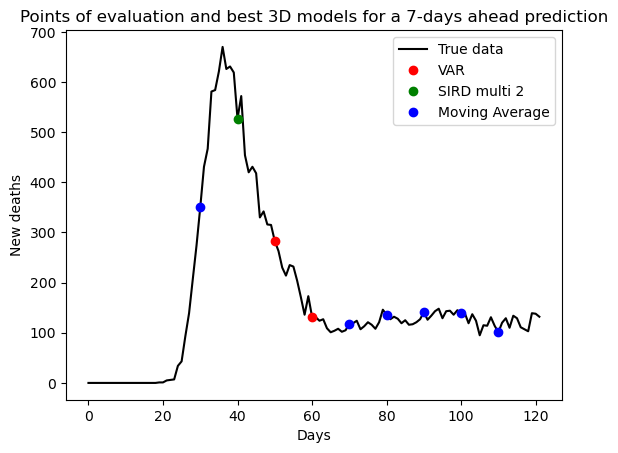

In [35]:
plt.plot(new_deaths, label='True data', c='black')
plt.plot([ 50, 60], new_deaths[[ 50, 60]], 'ro', label='VAR')
plt.plot([40], new_deaths[[40]], 'go', label= 'SIRD multi 2')
plt.plot( [70, 80, 30,90, 100,  110], new_deaths[ [70, 80, 30, 90,  100, 110]], 'bo', label= 'Moving Average')
# plt.plot([100], new_deaths[100], 'yo', label='Exp. Reg. Multi')
plt.legend()
plt.xlabel('Days')
plt.ylabel('New deaths')
plt.title('Points of evaluation and best 3D models for a 14-days ahead prediction')

In [21]:
scipy.optimize.Bounds(interval[0], interval[1])

Bounds(array([-5]), array([5]))

[2.10586866e-12]
[1.41421305]


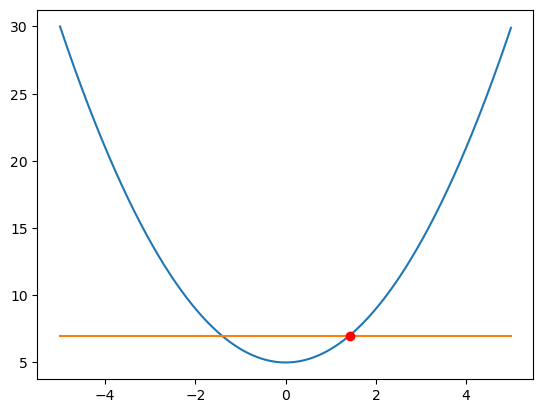

In [26]:
def g(x): 
    return x**2 + 5

from scipy.optimize import minimize
import scipy
import numpy as np
import matplotlib.pyplot as plt


def solve (f, interval, obj): 
    curve = lambda x : (f(x)-obj)**2
    res = minimize(curve,0.5,  bounds=scipy.optimize.Bounds(interval[0], interval[1]))
    print(curve(res.x))
    return res.x

interval=[-5, 5]
obj=7
solving=solve(g,(-10, 10), obj)
print(solving)
x=np.arange(interval[0], interval[1], 0.01)
y=g(x)
z=[obj]*len(x)
plt.plot(x, y)
plt.plot(x, z)
plt.plot(solving, g(solving), 'ro')

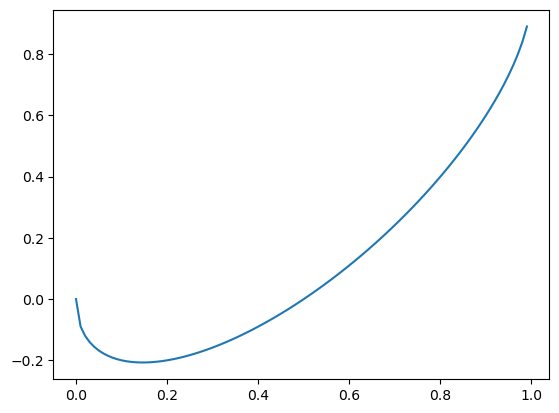

In [41]:
x=np.arange(0, 1, 0.01)
y=x-np.sqrt(x*(1-x))
plt.plot(x, y)

Text(0.5, 1.0, 'Points of evaluation and best 1D models for a 14-days ahead prediction')

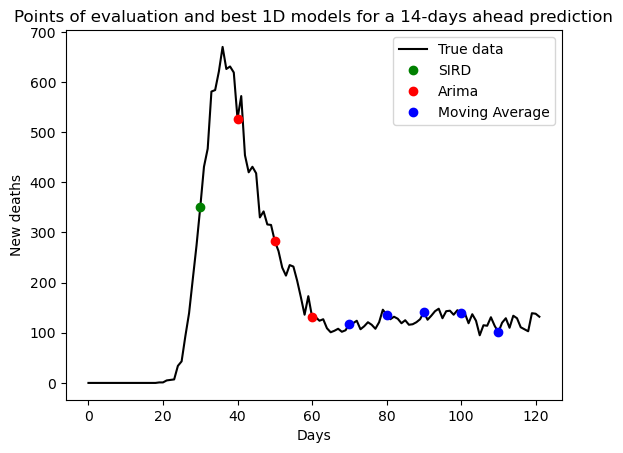

In [40]:
plt.plot(new_deaths, label='True data', c='black')
plt.plot([30], new_deaths[[30]], 'go', label= 'SIRD')

plt.plot([ 40, 50, 60], new_deaths[[ 40, 50, 60]], 'ro', label='Arima')
plt.plot( [70, 80, 90, 100,   110], new_deaths[ [70, 80, 90, 100,  110]], 'bo', label= 'Moving Average')
plt.legend()
plt.xlabel('Days')
plt.ylabel('New deaths')
plt.title('Points of evaluation and best 1D models for a 14-days ahead prediction')

Text(0.5, 1.0, 'Points of evaluation and best 3D models for a 7-days ahead prediction')

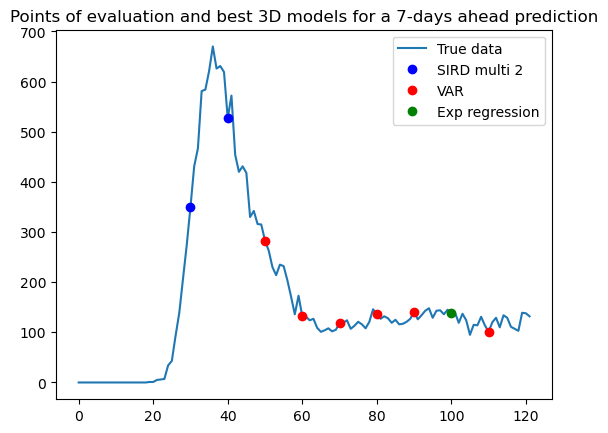

In [21]:
plt.plot(new_deaths, label='True data')
plt.plot([30, 40], new_deaths[[30, 40]], 'bo', label='SIRD multi 2')
plt.plot( [50, 60, 70, 80, 90,  110], new_deaths[ [50, 60, 70, 80, 90,  110]], 'ro', label= 'VAR')
plt.plot([100], new_deaths[[100]],'go',  label= 'Exp regression')
plt.legend()
plt.title('Points of evaluation and best 3D models for a 7-days ahead prediction')

Text(0.5, 1.0, 'Points of evaluation and best models for a 14-days ahead prediction')

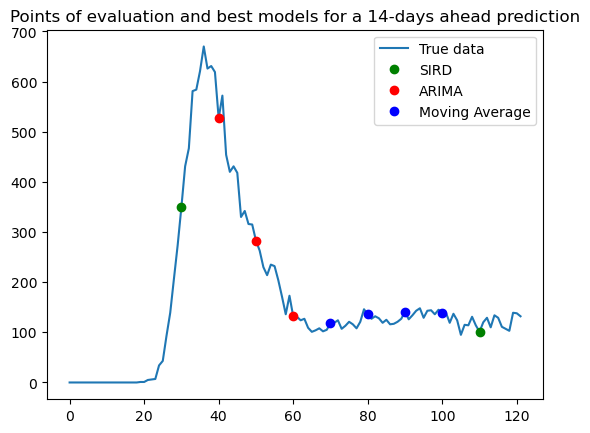

In [8]:
plt.plot(new_deaths, label='True data')
plt.plot([30, 110], new_deaths[[30,110]],'go',   label='SIRD')
plt.plot([ 40, 50, 60], new_deaths[[ 40, 50, 60]], 'ro', label='ARIMA')
plt.plot( [70, 80, 90, 100], new_deaths[ [70, 80, 90, 100]], 'bo', label= 'Moving Average')
plt.legend()
plt.title('Points of evaluation and best models for a 14-days ahead prediction')

In [9]:
# load results: 
import json
import numpy as np
import matplotlib.pyplot as plt
models1D=['SIRD', 'ExponentialRegression', 'MovingAverage', 'Arima', 'SIRD2']

with open('comparing_models_1D_reach=7.json', 'r') as f:
    dicoresults = json.load(f)
best_models_1D_7=[models1D[np.argmin(dicoresults[point])] for point in dicoresults.keys()]

with open('comparing_models_1D_reach=14.json', 'r') as f:
    dicoresults = json.load(f)
models1D=['SIRD', 'ExponentialRegression', 'MovingAverage', 'Arima', 'SIRD2']
best_models_1D_14=[models1D[np.argmin(dicoresults[point])] for point in dicoresults.keys()]

In [10]:
print(best_models_1D_14)
print(best_models_1D_7)
print(best_models_3D_14)
print(best_models_3D_7)

['Arima', 'MovingAverage', 'Arima', 'SIRD', 'SIRD', 'SIRD', 'Arima', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'SIRD']
['Arima', 'Arima', 'Arima', 'SIRD', 'Arima', 'SIRD', 'SIRD', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'MovingAverage', 'MovingAverage']


NameError: name 'best_models_3D_14' is not defined

In [ ]:
models3D=['SIRD', 'ExponentialRegression', 'MovingAverage', 'Arima']
with open('comparing_models_3D_reach=7.json', 'r') as f:
    dicoresults = json.load(f)
best_models_3D_7=[models3D[np.argmin(dicoresults[point])] for point in dicoresults.keys()]

with open('comparing_models_3D_reach=14.json', 'r') as f:
    dicoresults = json.load(f)
best_models_3D_14=[models3D[np.argmin(dicoresults[point])] for point in dicoresults.keys()]

In [ ]:
indexs_points=[[30],[35], [40], [45], [50],[55], [60],[65],  [70],[75],  [80],[85], [90],[95], [100],[105] , [110]]


In [ ]:
colours=['bo', 'ro', 'mo', 'go', 'co']

In [ ]:

models=['SIRD', 'ExponentialRegression', 'MovingAverage', 'Arima', 'SIRD2']

coloursdico=dict()
for i in range(len(models)): 
    coloursdico[models[i]]=colours[i]

aaaaaaaaaaaa
MovingAverage
SIRD
Arima


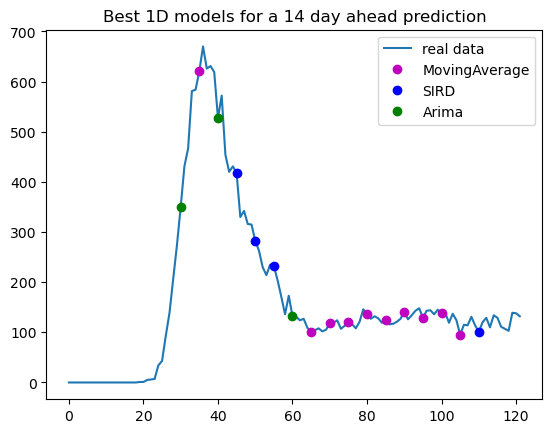

aaaaaaaaaaaa
MovingAverage
SIRD
Arima


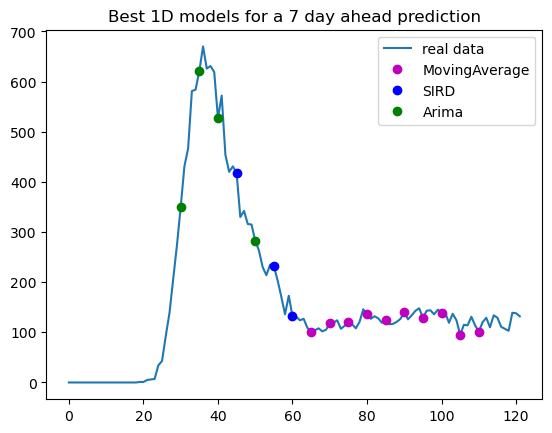

aaaaaaaaaaaa
SIRD
Arima


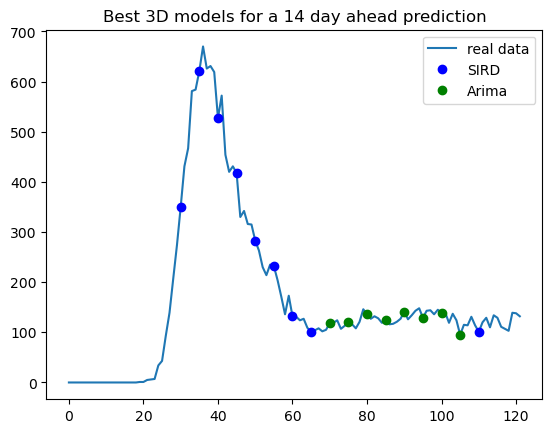

aaaaaaaaaaaa
ExponentialRegression
SIRD
Arima


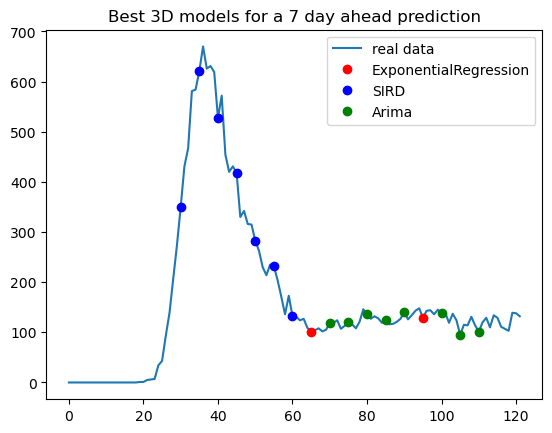

In [ ]:
def plot_best_models(best_models, indexs_points, title):
    plt.plot(new_deaths, label='real data')
    for i in range (len(list(set(best_models)))): 
        model = list(set(best_models))[i]
        print(model)
        colour=coloursdico[model]
        list_of_points=[]
        for j in range(len(best_models)): 
            if best_models[j]==model: 
                list_of_points.append(indexs_points[j])
        plt.plot(list_of_points, new_deaths[list_of_points], colour, label=model)
    plt.legend()
    plt.title(title)
    plt.show()
print('aaaaaaaaaaaa')
plot_best_models(best_models_1D_14, indexs_points, 'Best 1D models for a 14 day ahead prediction')
print('aaaaaaaaaaaa')

plot_best_models(best_models_1D_7, indexs_points, 'Best 1D models for a 7 day ahead prediction')
print('aaaaaaaaaaaa')

plot_best_models(best_models_3D_14, indexs_points, 'Best 3D models for a 14 day ahead prediction')
print('aaaaaaaaaaaa')

plot_best_models(best_models_3D_7, indexs_points, 'Best 3D models for a 7 day ahead prediction')
    